# Component Demonstration Notebook

A notebook to demonstrate some of the features of the Component class

Author: gavin.treseder@essentialenergy.com.au

In [61]:
#  Add root folder to python path
import sys
import os
sys.path.append(os.path.dirname(os.getcwd()))

import numpy as np 
import pandas as pd
import scipy.stats as ss

import plotly.express as px

from pof.component import Component
from pof.helper import str_to_dict

In [4]:
n_iterations= 100
t_end = 100

In [5]:
comp = Component.demo()

In [6]:
comp.sim_timeline(t_end=100)

In [7]:
comp.mc_timeline(t_end=t_end, n_iterations=n_iterations)

100%|██████████| 100/100 [00:03<00:00, 26.30it/s]


In [9]:
df_erc = comp.expected_risk_cost_df()
df_erc

,failure_mode,task,time,quantity,cost,fm_active,task_active,cost_cumulative,cost_annual,quantity_cumulative,quantity_annual
0,early_life,inspection,0,0,0,True,True,0,0,0,0
0,early_life,inspection,1,0,0,True,True,0,0,0,0
0,early_life,inspection,2,0,0,True,True,0,0,0,0
0,early_life,inspection,3,0,0,True,True,0,0,0,0
0,early_life,inspection,4,0,0,True,True,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
19,fast_aging,on_condition_repair,96,0,0,True,True,13300,0,133,0
19,fast_aging,on_condition_repair,97,0,0,True,True,13300,0,133,0
19,fast_aging,on_condition_repair,98,0,0,True,True,13300,0,133,0
19,fast_aging,on_condition_repair,99,0,0,True,True,13300,0,133,0


In [10]:
comp.plot_erc()

In [7]:
erc = comp.expected_risk_cost()

In [8]:
df = pd.DataFrame().from_dict(erc, orient="index")
df.index.name = "failure_mode"
df = df.reset_index().melt(id_vars="failure_mode", var_name="task")
df = pd.concat(
    [df.drop(columns=["value"]), df["value"].apply(pd.Series)], axis=1
)[
    [
        "failure_mode",
        "task",
        "time",
        "quantity",
        "cost",
        "fm_active",
        "task_active",
    ]
].dropna()

In [9]:
df

,failure_mode,task,time,quantity,cost,fm_active,task_active
0,early_life,inspection,"[5, 11, 17, 23, 29, 35, 41, 47, 53, 59, 65, 71...","[99.0, 98.0, 98.0, 98.0, 97.0, 97.0, 97.0, 97....","[4950.0, 4900.0, 4900.0, 4900.0, 4850.0, 4850....",True,True
1,random,inspection,"[5, 11, 17, 23, 29, 35, 41, 47, 53, 59, 65, 71...","[99.0, 98.0, 98.0, 98.0, 97.0, 97.0, 97.0, 97....","[4950.0, 4900.0, 4900.0, 4900.0, 4850.0, 4850....",True,True
2,slow_aging,inspection,"[10, 16, 22, 28, 34, 40, 46, 52, 58, 64, 70, 7...","[98.0, 98.0, 98.0, 97.0, 97.0, 97.0, 97.0, 96....","[5390.0, 5390.0, 5390.0, 5335.0, 5335.0, 5335....",True,True
3,fast_aging,inspection,"[10, 16, 22, 28, 34, 40, 46, 52, 58, 64, 70, 7...","[98.0, 98.0, 98.0, 97.0, 97.0, 97.0, 97.0, 96....","[5390.0, 5390.0, 5390.0, 5335.0, 5335.0, 5335....",True,True
4,early_life,on_condition_replacement,[],[],[],True,True
5,random,on_condition_replacement,[],[],[],True,True
6,slow_aging,on_condition_replacement,[66],[1.0],[5000.0],True,True
7,fast_aging,on_condition_replacement,"[59, 61, 65, 66, 71, 72]","[2.0, 1.0, 2.0, 2.0, 3.0, 2.0]","[10000.0, 5000.0, 10000.0, 10000.0, 15000.0, 1...",True,True
8,early_life,on_failure_replacement,[],[],[],True,True
9,random,on_failure_replacement,"[3, 8, 27, 49, 55, 57, 60, 66, 82]","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]","[10000.0, 10000.0, 10000.0, 10000.0, 10000.0, ...",True,True


In [17]:
pd.DataFrame().from_dict(erc, orient="index").set_index(['fail'], inplace=True)

KeyError: "None of ['fail'] are in the columns"

In [17]:
df = comp.expected_sensitivity(var_name = 'comp-fm-random-dists-untreated-beta', lower=1, upper=10)
df.head()

100%|██████████| 100/100 [00:05<00:00, 17.49it/s]


,source,active,cost,annual_cost,beta
0,inspection,True,3001.8,33.117829,1
1,on_condition_repair,True,154.0,1.699029,1
2,on_condition_replacement,True,650.0,7.171227,1
3,on_failure_replacement,True,1200.0,13.239188,1
4,risk,True,6000.0,66.195940,1


In [18]:
comp.expected_cf()

[66, 60, 68, 56, 55, 67, 61, 66, 67, 67, 68, 55, 60, 67]

In [ ]:
ff_cf = {}
for fm in comp.fm.values():
    ff = len(fm.expected_ff())
    cf = len(fm.expected_cf())
    insp_effective = fm.inspection_effectiveness()
    ff_cf[fm.name] = {'ie':insp_effective, 'ff':ff, 'cf':cf}

In [20]:
df_summary = pd.DataFrame(ff_cf).T
df_summary[['ff %', 'cf %']] = df_summary[['ff', 'cf']].div(df_summary.sum(axis=1), axis=0)
df_summary

KeyError: "None of [Index(['ff', 'cf'], dtype='object')] are in the [columns]"

# Calbirating against population


In [11]:
file_path = r"C:\Users\gtreseder\OneDrive - KPMG\Documents\3. Client\Essential Energy\Probability of Failure Model\inputs" + os.sep
file_name = r"population_summary.csv"
pop_data = pd.read_csv(file_path + file_name)
pop_data.head()

,Unnamed: 0,pole_material,pole_strength,age,DAGD_perfect_condition,DCZD_condition_loss,DPWT_perfect_condition,total_consequence,pole_strength_bin,age_bin,total_consequence_bin,count
0,0,Aluminium,1.0,1.0,170.0,False,85.0,7233.082985,NaN,28.0,1059514.0,1
1,1,Aluminium,4.0,5.0,270.0,False,135.0,25724.354422,10.0,28.0,1059514.0,1
2,2,Aluminium,4.0,32.0,300.0,False,150.0,14973.041427,10.0,56.0,1059514.0,1
3,3,Aluminium,4.0,40.0,100.0,True,50.0,11984.512707,10.0,56.0,1059514.0,1
4,4,Aluminium,6.0,28.0,310.0,True,155.0,212509.206722,10.0,28.0,1059514.0,1


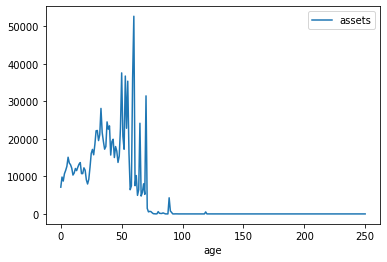

In [13]:
df_age = pop_data.loc[pop_data['pole_material']=='Timber'].groupby(by=['age'])[['count']].count().rename(columns={'count':'assets'})
df_age.index = df_age.index.astype(int)
df_age.plot();

In [14]:
def get_forecast_age(df, start_year, end_year, current_year=None):

    if current_year is None:
        current_year = start_year
        
    min_age = 0
    max_age = 100
    forecast_age = {}

    for year in range(start_year, end_year + 1):

        # Copy the df
        df_year = df.copy().rename(columns={'assets':year})

        # Adjust the age
        age_shift = year - current_year
        df_year.index = df_year.index + age_shift
        forecast_age[year] = df_year

    df_forecast = pd.concat(forecast_age, names=['year']).reset_index()
    df_forecast = df_forecast.loc[(df_forecast['age'] > min_age) & (df_forecast['age'] < max_age)]
    df_forecast = df_forecast.pivot(index='age', columns='year').fillna(0)
    
    return df_forecast

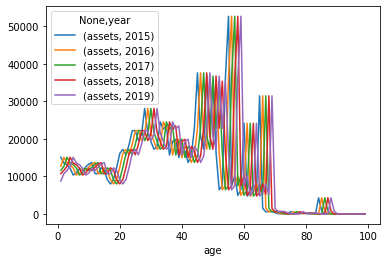

In [15]:
df_forecast_age = get_forecast_age(df=df_age, start_year = 2015, end_year = 2019, current_year = 2020)
df_forecast_age.plot();

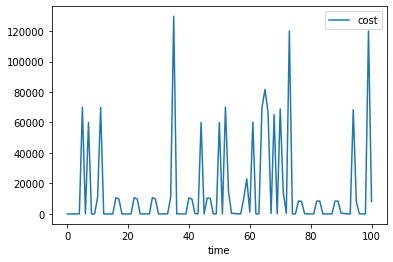

In [18]:
df_age_cost = df_erc.groupby(by=['time'])[['cost']].sum()
df_age_cost.plot();

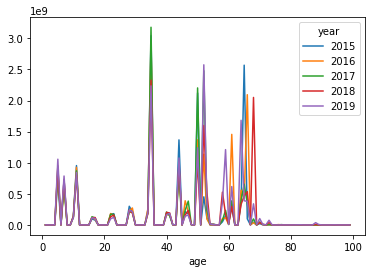

In [21]:
df_cost = df_forecast_age['assets'].mul(df_age_cost.reindex(df_forecast_age.index).values, axis=1)
df_cost.plot();

In [24]:
def get_cost_profile(df_age, df_erc, start_year, end_year, current_year=None):

    # Get the age forecast
    df_forecast_age = get_forecast_age(df=df_age, start_year = start_year, end_year = end_year, current_year = current_year)

    # Get the expected costs at each asset age
    df_age_cost = df_erc.groupby(by=['time'])[['cost']].sum()

    # Mutliply the age forecast by the costs at each age
    df_cost = df_forecast_age['assets'].mul(df_age_cost.reindex(df_forecast_age.index).values, axis=1)

    return df_cost

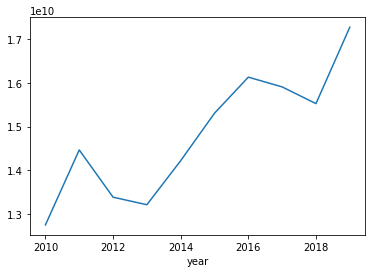

In [25]:
df_cost = get_cost_profile(df_age, df_erc, 2010, 2019, 2020)
df_cost.sum().plot();

In [26]:
df_age_cost = df_erc.groupby(by=['time', 'task'])[['cost']].sum().reset_index().pivot(index='time', columns='task')
df_age_cost

cost                                               \
task inspection on_condition_repair on_condition_replacement   
time                                                           
0           0.0                 0.0                      0.0   
1           0.0                 0.0                      0.0   
2           0.0                 0.0                      0.0   
3           0.0                 0.0                      0.0   
4           0.0                 0.0                      0.0   
...         ...                 ...                      ...   
96          0.0                 0.0                      0.0   
97          0.0                 0.0                      0.0   
98          0.0                 0.0                      0.0   
99          0.0                 0.0                      0.0   
100      8140.0                 0.0                      0.0   

                                       
task on_failure_replacement      risk  
time                                   
0                       0.0       0.0  
1                       0.0       0.0  
2                       0.0       0.0  
3                       0.0       0.0  
4                       0.0       0.0  
...                     ...       ...  
96                      0.0       0.0  
97                      0.0       0.0  
98                      0.0       0.0  
99                  20000.0  100000.0  
100                     0.0       0.0  

[101 rows x 5 columns]

In [96]:
df_erc.groupby(by=['task'])['quantity'].sum()

task
inspection                  5680.0
on_condition_repair          183.0
on_condition_replacement       8.0
on_failure_replacement        19.0
risk                          19.0
Name: quantity, dtype: float64

In [97]:
df_test = df_forecast_age.reset_index().melt(id_vars='age')[['age', 'year', 'value']].rename(columns={'value':'assets'})
df_test


,age,year,assets
0,1,2015,15092.0
1,2,2015,13549.0
2,3,2015,13101.0
3,4,2015,12181.0
4,5,2015,10345.0
...,...,...,...
490,95,2019,0.0
491,96,2019,1.0
492,97,2019,0.0
493,98,2019,3.0


In [90]:
df_test.merge(df_erc, left_on='age', right_on='time')

,age,year,assets,failure_mode,task,time,quantity,cost,fm_active,task_active,cost_cumulative,cost_annual,quantity_cumulative,quantity_annual
0,1,2015,15092.0,early_life,inspection,1,0,0,True,True,0,0,0,0
1,1,2015,15092.0,random,inspection,1,0,0,True,True,0,0,0,0
2,1,2015,15092.0,slow_aging,inspection,1,0,0,True,True,0,0,0,0
3,1,2015,15092.0,fast_aging,inspection,1,0,0,True,True,0,0,0,0
4,1,2015,15092.0,early_life,on_condition_replacement,1,0,0,True,True,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8905,99,2019,0.0,random,risk,99,0,0,True,True,550000,0,11,0
8906,99,2019,0.0,slow_aging,risk,99,0,0,True,True,50000,0,1,0
8907,99,2019,0.0,fast_aging,risk,99,1,50000,True,True,300000,555.988,6,0.0111198
8908,99,2019,0.0,slow_aging,on_condition_repair,99,0,0,True,True,5000,0,50,0


In [105]:
df = df_test.merge(df_erc, left_on='age', right_on='time')
df['expected'] = df['assets'] * df['quantity']
df = df.groupby(by=['year', 'task'])[['expected']].sum().reset_index()
df.pivot(index='task', columns='year')

expected                                      \
year                            2015        2016        2017        2018   
task                                                                       
inspection                60712732.0  63272880.0  67933200.0  70722158.0   
on_condition_repair        2173499.0   1482155.0   1505575.0   1457608.0   
on_condition_replacement     85417.0     59016.0     60004.0    101862.0   
on_failure_replacement      191440.0    205904.0    198286.0    185883.0   
risk                        191440.0    205904.0    198286.0    185883.0   

                                      
year                            2019  
task                                  
inspection                77057286.0  
on_condition_repair        3079804.0  
on_condition_replacement    149005.0  
on_failure_replacement      202823.0  
risk                        202823.0

In [87]:
px.line(
    df_plot,
    x='year',
    y="expected",
    color="task",
    # color_discrete_map=color_map,
    # line_dash="strategy",
    # line_group="strategy",
    title="Probability of Failure given Maintenance Strategy",
)

# Illyse's Stuff
Everything below here is work that illyse completed

In [4]:
def update_pof_figure2():

    pof = dict(
        untreated = pd.DataFrame(comp.expected_untreated(t_end=200)),
        treated = pd.DataFrame(comp.expected_pof(t_end=200)),
    )

    df = pd.concat(pof).rename_axis(['strategy', 'time']).reset_index()
    df = df.melt(id_vars = ['time', 'strategy'], var_name='source', value_name='pof')

    fig = px.line(df,x='time', y='pof', color='source', line_dash = 'strategy', line_group='strategy')
    return fig

update_pof_figure2().show()

def update_pof_figure():
    pof = comp.expected_pof(t_end=200)

    df = pd.DataFrame(pof)
    df.index.name = 'time'
    df = df.reset_index().melt(id_vars = 'time', var_name='source', value_name='pof')

    fig = px.line(df,x='time', y='pof', color='source', line_dash = 'source')
    return fig

update_pof_figure().show()

In [5]:
def expected_inspection_interval(x_min, x_max, n_iterations=100):
    rc = dict()
    comp.reset()

    for i in range(max(1, x_min),x_max,1):

        # Set t_interval
        for fm in comp.fm.values():
            if 'inspection' in list(fm.tasks):
                fm.tasks['inspection'].t_interval = i
        
        comp.mc_timeline(t_end=100, n_iterations=n_iterations)

        rc[i] = comp.expected_risk_cost_df().groupby(by=['task'])['cost'].sum()
        rc[i]['inspection_interval'] = i

        # Reset component
        comp.reset()

    df = pd.DataFrame().from_dict(rc, orient='index')
    df['total_cost'] = df.drop(['inspection_interval', 'risk'], axis=1).sum(axis=1)
    df['total'] = df['total_cost'] + df['risk']
    
    return df

df = expected_inspection_interval(0, 10)

d
fast_degrading not found
slow_degrading not found
fast_degrading not found
slow_degrading not found
fast_degrading not found
slow_degrading not found
fast_degrading not found
slow_degrading not found
fast_degrading not found
slow_degrading not found
fast_degrading not found
slow_degrading not found
fast_degrading not found
slow_degrading not found
fast_degrading not found
slow_degrading not found
fast_degrading not found
slow_degrading not found
fast_degrading not found
slow_degrading not found
fast_degrading not found
slow_degrading not found
fast_degrading not found
slow_degrading not found
fast_degrading not found
slow_degrading not found
fast_degrading not found
slow_degrading not found
fast_degrading not found
slow_degrading not found
fast_degrading not found
slow_degrading not found
fast_degrading not found
slow_degrading not found
fast_degrading not found
slow_degrading not found
fast_degrading not found
slow_degrading not found
fast_degrading not found
slow_degrading not foun

In [6]:

def update_inspection_interval_figure():
    
    df = expected_inspection_interval(0,10)
    df_plot = df.melt(id_vars='inspection_interval', var_name = 'source', value_name='cost')
    fig = px.line(df_plot, x="inspection_interval", y="cost", color='source', title='Risk v Cost at different Inspection Intervals')
    return fig

update_inspection_interval_figure().show()

100%|██████████| 100/100 [00:02<00:00, 33.92it/s]


In [7]:
n_iterations = 1000
t_min = 0
t_max = 10
scen = dict()

comp= Component().set_demo()

df_mean = expected_inspection_interval(0, 10, 1000)

comp= Component().set_demo()

for fm in comp.fm.values():
    fm.cof.risk_cost_total = 12000

df_low_c = expected_inspection_interval(0, 10, 1000)

comp= Component().set_demo()

for fm in comp.fm.values():
    fm.cof.risk_cost_total = 120000

df_high_c = expected_inspection_interval(0, 10, 1000)

comp= Component().set_demo()

for fm in comp.fm.values():
    fm.untreated.alpha = fm.untreated.alpha * 2
    fm.calc_init_dist()

df_low_pof = expected_inspection_interval(0, 10, 1000)

comp= Component().set_demo()

for fm in comp.fm.values():
    fm.untreated.alpha = fm.untreated.alpha / 2
    fm.calc_init_dist()

df_high_pof = expected_inspection_interval(0, 10, 1000)

100%|██████████| 1000/1000 [00:11<00:00, 88.50it/s]


In [8]:
    df_plot = df_low_pof.melt(id_vars='inspection_interval', var_name = 'source', value_name='cost')
    fig = px.line(df_plot, x="inspection_interval", y="cost", color='source', title='Risk v Cost at different Inspection Intervals')
    fig.show()

In [128]:
df_all = pd.concat(dict(
    mean = df_mean,
    high_c = df_high_c,
    low_c = df_low_c,
    low_pof = df_low_pof,
    high_pof = df_high_pof,
), ignore_index=False).reset_index()

df_all = df_all.rename(columns = {'level_0':'scenario'})

df_all['value_lost'] = (df_all['total'] - df_all.groupby(by = ['scenario'])['total'].transform('min'))/100 # time considered

df_plot = df_all#df_all.melt(id_vars='inspection_interval', var_name = 'source', value_name='cost')
fig = px.line(df_plot, x="inspection_interval", y="value_lost", color='scenario', title='Risk v Cost at different Inspection Intervals', color_discrete_sequence=px.colors.qualitative.Vivid)
fig.show()

In [66]:
filename = r"C:\Users\gtreseder\OneDrive - KPMG\Documents\3. Client\Essential Energy\Probability of Failure Model\ACS - Poles - Consequences 2.csv"
df_poles = pd.read_csv(filename)


In [190]:
depots = ['Young Depot', 'Temora Depot', 'Yass Depot', 'Young Depot', 'Bathurst Depot']

<AxesSubplot:ylabel='Depot (ZSG Area)'>

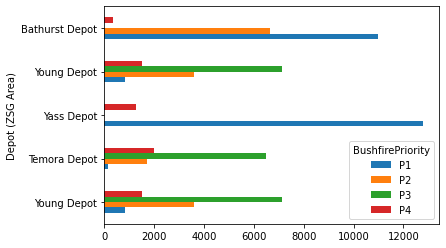

In [191]:

bushfire = df_poles.pivot_table(index='Depot (ZSG Area)', columns= 'BushfirePriority', values = 'ASSET_ID', aggfunc=len).fillna(0).astype(int)
bushfire.loc[depots].plot(kind='barh')

In [192]:
bushfire.loc[(bushfire != 0).all(axis=1)]

BushfirePriority,P1,P2,P3,P4
Depot (ZSG Area),,,,
Bulahdelah Depot,135,2404,4531,981
Griffith Depot,327,10682,2286,4387
Temora Depot,136,1719,6500,1989
Young Depot,816,3597,7123,1533
[ Deleted Assets ],22,266,83,39


In [193]:
bushfire = bushfire.reset_index().melt(id_vars='Depot (ZSG Area)', value_name='population')
bushfire.head()

,Depot (ZSG Area),BushfirePriority,population
0,Albury Depot,P1,2065
1,Armidale Depot,P1,0
2,Ballina Depot,P1,0
3,Balranald Depot,P1,0
4,Barham Depot,P1,0


In [194]:
df_bushfire = df_all.loc[df_all['scenario'].isin(['high_c', 'low_c']), ['scenario', 'inspection_interval', 'value_lost']]

In [195]:
df_bushfire['key'] = 0
bushfire['key'] = 0

jt = bushfire.merge(df_bushfire, on='key', how='outer')
jt.head()

,Depot (ZSG Area),BushfirePriority,population,key,scenario,inspection_interval,value_lost
0,Albury Depot,P1,2065,0,high_c,1,71.35
1,Albury Depot,P1,2065,0,high_c,2,0.00
2,Albury Depot,P1,2065,0,high_c,3,10.59
3,Albury Depot,P1,2065,0,high_c,4,79.56
4,Albury Depot,P1,2065,0,high_c,5,265.90


In [196]:
jt['total_value_lost'] = (jt.population * jt.value_lost).where((jt.BushfirePriority == 'P1') & (jt.scenario == 'high_c')).fillna(0)
jt['total_value_lost'] = jt['total_value_lost'] + (jt.population * jt.value_lost).where((jt.BushfirePriority != 'P1') & (jt.scenario == 'low_c')).fillna(0)
jt.head()

,Depot (ZSG Area),BushfirePriority,population,key,scenario,inspection_interval,value_lost,total_value_lost
0,Albury Depot,P1,2065,0,high_c,1,71.35,147337.75
1,Albury Depot,P1,2065,0,high_c,2,0.00,0.00
2,Albury Depot,P1,2065,0,high_c,3,10.59,21868.35
3,Albury Depot,P1,2065,0,high_c,4,79.56,164291.40
4,Albury Depot,P1,2065,0,high_c,5,265.90,549083.50


In [197]:
rh = jt.groupby(by=['Depot (ZSG Area)', 'inspection_interval'])['total_value_lost'].sum().reset_index()

In [198]:
rh = rh.loc[rh['Depot (ZSG Area)'].isin(depots)]

fig = px.line(
    rh,
    x="inspection_interval",
    y="total_value_lost",
    color="Depot (ZSG Area)",
    title= 'Optimum Inspection Interval by Depot'
)
fig

In [199]:
rh.groupby(by=['Depot (ZSG Area)']).min()

,inspection_interval,total_value_lost
Depot (ZSG Area),,
Bathurst Depot,1,129291.74
Temora Depot,1,10820.16
Yass Depot,1,29534.58
Young Depot,1,31309.49


In [51]:
fig = px.area(
    df,
    x="time",
    y="cost_cumulative",
    color="task",
    line_group = 'failure_mode'
)
fig

ValueError: Value of 'x' is not the name of a column in 'data_frame'. Expected one of ['immediate_replacement', 'inspection', 'on_condition_repair', 'on_condition_replacement', 'risk', 'inspection_interval', 'total_cost', 'total'] but received: time

101

In [112]:
comp.mc_timeline(200, n_iterations=1000)

100%|██████████| 1000/1000 [00:25<00:00, 39.15it/s]


In [113]:

import plotly.graph_objects as go


def update_condition_fig(*args):
    """ Updates the condition figure"""

    fig = go.Figure()

    ecl = comp.expected_condition_loss()

    cmap = px.colors.qualitative.Safe
    ci = 0

    for cond_name, cond in ecl.items():
        # Format the data for plotting
        length = len(cond['mean'])
        time = np.linspace(0,length  -1, length, dtype=int) # TODO take time as a variable
        x = np.append(time,time[::-1])
        y = np.append(cond['upper'], cond['lower'][::-1])

        # Add the boundary
        fig.add_trace(go.Scatter(
            x=x,
            y=y,
            fill='toself',
            fillcolor='rgba' + cmap[ci][3:-2] + ',0.2)',
            line_color='rgba(255,255,255,0)',
            showlegend=False,
            name=cond_name,
        ))
        fig.add_trace(go.Scatter(
            x=time, y=cond['mean'],
            line_color=cmap[ci],
            name=cond_name,
        ))

        ci = ci + 1

        fig.update_traces(mode='lines')
        fig.update_xaxes(title_text='Time')
        fig.update_yaxes(title_text='Condition (%)')

    return fig


fig = update_condition_fig()
fig.show()

In [11]:
fm = comp.fm['random']
stdev = 1

expected = dict()
for cond_name, condition in fm.conditions.items():

    ec = np.array([fm._timelines[x][cond_name] for x in fm._timelines])

    mean = condition.perfect - ec.mean(axis=0)
    sd = ec.std(axis=0)
    upper = mean + sd*stdev
    lower = mean - sd*stdev

    upper[upper > condition.perfect] = condition.perfect
    lower[lower < condition.failed] = condition.failed

    expected[cond_name] = dict(
        lower=lower,
        mean=mean,
        upper=upper,
        sd=sd,
            )

TypeError: 'numpy.float64' object does not support item assignment

In [18]:
fm.timeline

{}

In [13]:
n_time = 1001
time = list(np.linspace(0,n_time - 1, n_time))

failure_modes = []
tasks = []
times = []
costs = []
cumulative_costs = []

n_fm = len(erc)

for fm, fm_values in erc.items():

    for task, task_values in fm_values.items():
        failure_mode = np.full(n_time, fm)
        task = np.full(n_time, task)
        cost = np.full(n_time, 0)
        cost[task_values['time']] = task_values['cost']
        cumulative_cost = cost.cumsum()

        failure_modes = np.append(failure_modes, failure_mode)
        tasks = np.append(tasks, task)
        costs = np.append(costs, cost)
        times = np.append(times, time)
        cumulative_costs = np.append(cumulative_costs, cumulative_cost)


df = pd.DataFrame(
    dict(
        failure_mode=failure_modes,
        task=tasks,
        time=times,
        cost=costs,
        cumulative_cost=cumulative_costs,
    )
)

IndexError: arrays used as indices must be of integer (or boolean) type

In [14]:
times = np.linspace(0,100,101, dtype=int)
n=101

time = np.array(df['time'].values.tolist())
cost = np.array(df['cost'].values.tolist())
fmt = np.repeat(df[['failure_mode', 'task']].to_numpy(),n, axis=0)
pd.DataFrame(np.column_stack((a, vals.ravel())), columns=df.columns)

NameError: name 'a' is not defined

In [15]:
profile = comp.fm['random'].expected_cost()
profile['risk'] = comp.fm['random'].expected_risk()

AttributeError: 'FailureMode' object has no attribute 'expected_cost'

In [16]:
%timeit comp.fm['slow_aging'].expected_cost_df()

27.6 ms ± 9.8 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [17]:
%timeit comp.fm['slow_aging'].expected_risk_cost_df()

3.79 ms ± 535 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [18]:
rc = comp.fm['slow_aging'].expected_risk_cost()

In [19]:
new_index = pd.Index(np.arange(0, 200, 1), name="time")

t = rc['inspection']['time']
c = rc['inspection']['cost']

In [20]:
tc = dict(task=[], time=[], cost=[])

for k, v in rc.items():
    tc['task'] = np.append(tc['task'], np.full(len(v['time']), k))
    for m in ['time', 'cost']:
        time = tc[m]
        
        

        tc[m] = np.append(tc[m], v[m])

array([ 0. , 50. , 50. , 50. , 50. , 50. , 50. , 50. , 50. , 50. , 50. ,
       50. , 50. , 50. , 50. , 50. , 50. , 50. , 50. , 50. , 50. , 50. ,
       50. , 50. , 50. , 50. , 50. , 50. , 50. , 50. , 50. , 50. , 50. ,
       50. , 50. , 50. , 50. , 50. , 50. , 50. , 49.5])

In [21]:
df = comp.fm['random'].expected_risk_cost_df()
df.index.name = 'task'
df = df.reset_index()

In [22]:
df = comp.fm['slow_aging'].expected_risk_cost_df()

In [23]:

px.line(
    df.reset_index(),
    x="time",
    y="cumulative_cost",
    color="task",
    line_group =
)

SyntaxError: invalid syntax (<ipython-input-23-cdf092dcd93a>, line 7)

In [6]:
comp = Component().demo()
comp.fm

{}

In [16]:
df = comp.sensitivity("comp-fm-early_life-dists-untreated-alpha", 0, 5)

100%|██████████| 10/10 [00:00<00:00, 75.19it/s]


In [17]:
df

,risk_cost,alpha,direct_cost,total
1,55000,1,80500,135500
2,30000,2,29445,59445
3,19997,3,17108,37105
4,15000,4,11305,26305


In [18]:
df = comp.sensitivity("comp-fm-early_life-tasks-inspection-cost", 50, 55)

100%|██████████| 10/10 [00:00<00:00, 73.57it/s]


In [19]:
df

,risk_cost,cost,direct_cost,total
50,10000,50,9698,19698
51,9164,51,9629,18793
52,9282,52,6421,15703
53,6875,53,4930,11805
54,7217,54,5482,12699


In [5]:
import plotly.graph_objects as go

def make_sensitivity_fig(local, var_name = "comp-fm-early_life-tasks-inspection-cost", lower=0, upper=10, step=1, n_iterations=10):
    
    var = var_name.split("-")[-1]

    try:
        df = local.sensitivity(var_name = var_name, lower=lower, upper=upper, step=step, n_iterations=n_iterations
        )
        df_plot = df.melt(id_vars=var, var_name="source", value_name="Cost")
        fig = px.line(
            df_plot,
            x=var,
            y="Cost",
            color="source",
            title="Risk v Cost at different " + var,
        )
    except:
        fig = go.Figure(
            layout=go.Layout(
                title=go.layout.Title(text="Error Producing " + var)
            )
        )

    return fig

In [8]:
var_name = "comp-fm-early_life-tasks-inspection-cost"
var = var_name.split("-")[-1]

df = comp.sensitivity(var_name = var_name, lower=0, upper=1000, step=100, n_iterations=100)

100%|██████████| 100/100 [00:01<00:00, 72.51it/s]


In [3]:
comp.fm.pop('fast_aging')
comp.fm.pop('slow_aging')
comp.fm.pop('random')
comp.fm

{'early_life': <pof.failure_mode.FailureMode at 0x5afe5f8>}

In [10]:
#only early_life
fig = make_sensitivity_fig(comp, var_name = "comp-fm-early_life-tasks-inspection-cost", lower=0, upper=1000, step=100, n_iterations=100)
fig.show()

100%|██████████| 100/100 [00:01<00:00, 85.05it/s]


In [4]:
comp.fm.pop('slow_aging')
comp.fm.pop('random')
comp.fm

{'early_life': <pof.failure_mode.FailureMode at 0x52ee688>,
 'fast_aging': <pof.failure_mode.FailureMode at 0x1b915bc8>}

In [5]:
#early_life + fast_aging
fig = make_sensitivity_fig(comp, var_name = "comp-fm-early_life-tasks-inspection-cost", lower=0, upper=1000, step=100, n_iterations=100)
fig.show()

100%|██████████| 100/100 [00:00<00:00, 134.59it/s]


In [2]:
comp = Component().demo()
comp.fm

{'early_life': <pof.failure_mode.FailureMode at 0x1b923538>,
 'random': <pof.failure_mode.FailureMode at 0x1b923658>,
 'slow_aging': <pof.failure_mode.FailureMode at 0x1b9237d8>,
 'fast_aging': <pof.failure_mode.FailureMode at 0x1b9239a0>}

In [3]:
comp.fm.pop('random')
comp.fm

{'early_life': <pof.failure_mode.FailureMode at 0x624e1d8>,
 'slow_aging': <pof.failure_mode.FailureMode at 0x1c42b100>,
 'fast_aging': <pof.failure_mode.FailureMode at 0x1ccd5bb0>}

In [6]:
#early_life + fast_aging + slow_aging
fig = make_sensitivity_fig(comp, var_name = "comp-fm-early_life-tasks-inspection-cost", lower=0, upper=1000, step=100, n_iterations=100)
fig.show()

100%|██████████| 100/100 [00:00<00:00, 107.64it/s]


In [3]:
comp.fm.pop('early_life')
comp.fm.pop('slow_aging')
comp.fm.pop('random')
comp.fm

{'fast_aging': <pof.failure_mode.FailureMode at 0x1bfa5be0>}

In [13]:
#fast_aging
fig = make_sensitivity_fig(comp, var_name = "comp-fm-fast_aging-tasks-inspection-cost", lower=0, upper=1000, step=100, n_iterations=100)
fig.show()

100%|██████████| 100/100 [00:00<00:00, 195.31it/s]


In [6]:
fig = make_sensitivity_fig(comp, var_name = "comp-fm-fast_aging-dists-untreated-alpha", lower=0, upper=10, step=1, n_iterations=100)
fig.show()

100%|██████████| 100/100 [00:00<00:00, 109.65it/s]


In [5]:
comp.fm["fast_aging"].tasks["inspection"].cost = 0
comp.fm["fast_aging"].tasks["inspection"].cost

0

In [6]:
comp.mc_timeline(100)

100%|██████████| 100/100 [00:00<00:00, 150.60it/s]


In [7]:
comp.expected_risk_cost()

{'fast_aging': {'inspection': {'time': array([  5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,  65,
           70,  75,  80,  85,  90,  95, 100]),
   'cost': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0.])},
  'on_condition_repair': {'time': array([32, 37, 38, 43, 46, 48, 51, 52, 53, 54, 56, 57, 61, 62, 63, 66, 67,
          68, 69, 71, 72, 73, 74, 76, 77, 78, 79, 81, 82, 83, 86, 87, 88, 91,
          92, 93, 94, 95, 96, 97, 98]),
   'cost': array([1., 1., 2., 2., 3., 1., 2., 2., 1., 1., 2., 3., 3., 2., 1., 3., 3.,
          1., 1., 5., 1., 1., 1., 1., 1., 3., 1., 5., 1., 1., 4., 3., 1., 3.,
          3., 2., 1., 1., 4., 2., 1.])},
  'on_condition_replacement': {'time': array([], dtype=float64),
   'cost': array([], dtype=float64)},
  'risk': {'time': array([61, 81], dtype=int32), 'cost': array([500., 500.])}}}

In [8]:
comp.fm["fast_aging"].tasks["inspection"].cost = 1000
comp.fm["fast_aging"].tasks["inspection"].cost

1000

In [9]:
comp.mc_timeline(100)

100%|██████████| 100/100 [00:00<00:00, 156.74it/s]


In [10]:
comp.expected_risk_cost()

{'fast_aging': {'inspection': {'time': array([  5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,  65,
           70,  75,  80,  85,  90,  95, 100]),
   'cost': array([1000., 1000., 1000., 1000., 1000., 1000., 1000., 1000., 1000.,
          1000., 1000., 1000., 1000., 1000., 1000., 1000., 1000., 1000.,
          1000., 1000.])},
  'on_condition_repair': {'time': array([31, 32, 38, 46, 51, 52, 53, 56, 57, 58, 61, 62, 63, 64, 65, 66, 67,
          71, 72, 73, 76, 78, 79, 81, 82, 83, 84, 86, 87, 88, 89, 91, 92, 93,
          96, 97, 98]),
   'cost': array([1., 1., 1., 1., 3., 1., 1., 1., 1., 1., 5., 2., 2., 1., 1., 3., 1.,
          3., 4., 1., 5., 1., 1., 7., 3., 1., 1., 8., 4., 3., 1., 4., 3., 1.,
          5., 2., 2.])},
  'on_condition_replacement': {'time': array([], dtype=float64),
   'cost': array([], dtype=float64)},
  'risk': {'time': array([ 66,  68,  70,  98, 100], dtype=int32),
   'cost': array([500., 500., 500., 500., 500.])}}}

In [11]:
comp.fm["fast_aging"].timeline = {}
comp.fm["fast_aging"]._timelines = {}
comp.fm["fast_aging"].__dict__

{'_name': 'fast_aging',
 'active': True,
 '_pf_curve': 'linear',
 '_pf_interval': 10,
 'pf_std': 0,
 'dists': {'untreated': Distribution(name='untreated', alpha=100, beta=3.5, gamma=10),
  'init': Distribution(name='dist', alpha=100, beta=3.5, gamma=0)},
 'indicators': {'slow_degrading': ConditionIndicator(name='slow_degrading', pf_curve='linear', pf_interval=20, pf_std=0.5, perfect=100, failed=0, decreasing=True, threshold_detection=100, threshold_failure=0),
  'fast_degrading': ConditionIndicator(name='fast_degrading', pf_curve='linear', pf_interval=10, pf_std=0.5, perfect=100, failed=0, decreasing=True, threshold_detection=100, threshold_failure=0)},
 'conditions': {'slow_degrading': {'name': 'slow_degrading',
   'perfect': 100,
   'failed': 0,
   'pf_curve': 'linear',
   'pf_interval': 20,
   'pf_std': 0.5},
  'fast_degrading': {'name': 'fast_degrading',
   'perfect': 100,
   'failed': 0,
   'pf_curve': 'linear',
   'pf_interval': 10,
   'pf_std': 0.5}},
 'consequences': {},
 'cons

In [6]:
df = comp.sensitivity("comp-fm-early_life-tasks-inspection-cost", 50, 55)

100%|██████████| 10/10 [00:00<00:00, 71.93it/s]


In [37]:
from pof.failure_mode import FailureMode
import pof.demo as demo

fm = FailureMode.from_dict(demo.failure_mode_data["random"])
fm.name = "fm"

In [26]:
df = fm.sensitivity("fm-dists-untreated-alpha", 0, 5)

100%|██████████| 10/10 [00:00<00:00, 138.90it/s]


In [4]:
df

,alpha,direct_cost,risk_cost,total
1,1,1600,5000,6600
2,2,540,0,540
3,3,526,1666,2192
4,4,510,2500,3010


In [40]:
fig = make_sensitivity_fig(var_name = "fm-tasks-inspection-cost", lower=0, upper=1000, step=100, n_iterations=20)
fig.show()

100%|██████████| 20/20 [00:00<00:00, 188.67it/s]


In [38]:
import plotly.graph_objects as go

def make_sensitivity_fig(var_name = "comp-fm-early_life-tasks-inspection-cost", lower=0, upper=10, step=1, n_iterations=10):
    
    var = var_name.split("-")[-1]

    try:
        df = fm.sensitivity(var_name = var_name, lower=lower, upper=upper, step=step, n_iterations=n_iterations
        )
        df_plot = df.melt(id_vars=var, var_name="source", value_name="Cost")
        fig = px.line(
            df_plot,
            x=var,
            y="Cost",
            color="source",
            title="Risk v Cost at different " + var,
        )
    except:
        fig = go.Figure(
            layout=go.Layout(
                title=go.layout.Title(text="Error Producing " + var)
            )
        )

    return fig

In [7]:
failure_mode_data = dict(
        name='early_life',
        pf_curve = 'linear',
        pf_interval=10)

In [10]:
for var, val in failure_mode_data.items():
    d = {}
    d[var] = val
    print(d)

{'name': 'early_life'}
{'pf_curve': 'linear'}
{'pf_interval': 10}


In [3]:
comp.get_dash_ids()

['comp-active',
 'comp-fm-early_life-active',
 'comp-fm-early_life-pf_curve',
 'comp-fm-early_life-pf_interval',
 'comp-fm-early_life-pf_std',
 'comp-fm-early_life-dists-untreated-alpha',
 'comp-fm-early_life-dists-untreated-beta',
 'comp-fm-early_life-dists-untreated-gamma',
 'comp-fm-early_life-tasks-inspection-active',
 'comp-fm-early_life-tasks-inspection-p_effective',
 'comp-fm-early_life-tasks-inspection-cost',
 'comp-fm-early_life-tasks-inspection-t_interval',
 'comp-fm-early_life-tasks-inspection-t_delay',
 'comp-fm-early_life-tasks-inspection-trigger-condition-instant-lower',
 'comp-fm-early_life-tasks-inspection-trigger-condition-instant-upper',
 'comp-fm-early_life-tasks-inspection-trigger-state-initiation',
 'comp-fm-early_life-tasks-inspection-impact-state-detection',
 'comp-fm-early_life-tasks-on_condition_replacement-active',
 'comp-fm-early_life-tasks-on_condition_replacement-p_effective',
 'comp-fm-early_life-tasks-on_condition_replacement-cost',
 'comp-fm-early_life-t

In [3]:
def component_val_to_csv():
    comp = Component().demo()

    
    d = {}
    d_split = {}
    for id_ in comp.get_dash_ids():
        
        id_str = id_.split("comp" + "-", 1)[1]
        id_str = id_str.split("-")

        value = comp

        for s in id_str:
            if s == "fm":
                value = value.fm
            elif s == "active":
                value = value.active
            elif s == "pf_curve":
                value = value.pf_curve
            elif s == "pf_interval":
                value = value.pf_interval
            elif s == "pf_std":
                value = value.pf_std
            elif s == "dists":
                value = value.dists
            elif s == "alpha":
                value = value.alpha
            elif s == "beta":
                value = value.beta
            elif s == "gamma":
                value = value.gamma
            elif s == "tasks":
                value = value.tasks
            elif s == "p_effective":
                value = value.p_effective
            elif s == "cost":
                value = value.cost
            elif s == "t_interval":
                value = value.t_interval
            elif s == "t_delay":
                value = value.t_delay
            elif s == "states":
                value = value.states
            elif s == "impact":
                value = value.impacts
            elif s == "trigger":
                value = value.triggers
            elif s == id_str[-1]:
                # if isinstance(value[s], str):
                #     continue
                # elif isinstance(value[s], bool):
                #     continue
                # else:
                #     d[id_] = value[s]
                #     d_split[id_] = id_.split("-")
                d[id_] = value[s]
                d_split[id_] = id_.split("-")
            else:
                value = value[s]
    df = pd.DataFrame(d.items(), columns=['name', 'mean'])
    test = pd.DataFrame(d_split.items())
    df[["key_1", "key_2", "key_3", "key_4", "key_5", "key_6", "key_7", "key_8", "key_9"]] = pd.DataFrame(test[1].to_list())
    df.set_index(["name"], drop = True).to_csv("csv.csv")


In [12]:
# import pof.test.fixtures
# comp = Component.from_dict(fixtures.component_data_slow["comp"])

comp = Component().demo()
# comp.fm.pop('fast_aging')
# comp.fm.pop('early_life')
# comp.fm.pop('random')

d = {}
d_split = {}
for id_ in comp.get_dash_ids():
    
    id_str = id_.split("comp" + "-", 1)[1]
    id_str = id_str.split("-")

    value = comp

    for s in id_str:
        if s == "fm":
            value = value.fm
        elif s == "active":
            value = value.active
            if isinstance(value, str):
                continue
            elif isinstance(value, bool):
                continue
            else:
                d[id_] = value
                d_split[id_] = id_.split("-")
        elif s == "pf_curve":
            value = value.pf_curve
            if isinstance(value, str):
                continue
            elif isinstance(value, bool):
                continue
            else:
                d[id_] = value
                d_split[id_] = id_.split("-")
        elif s == "pf_interval":
            value = value.pf_interval
            if isinstance(value, str):
                continue
            elif isinstance(value, bool):
                continue
            else:
                d[id_] = value
                d_split[id_] = id_.split("-")
        elif s == "pf_std":
            value = value.pf_std
            if isinstance(value, str):
                continue
            elif isinstance(value, bool):
                continue
            else:
                d[id_] = value
                d_split[id_] = id_.split("-")
        elif s == "dists":
            value = value.dists
        elif s == "alpha":
            value = value.alpha
            if isinstance(value, str):
                continue
            elif isinstance(value, bool):
                continue
            else:
                d[id_] = value
                d_split[id_] = id_.split("-")
        elif s == "beta":
            value = value.beta
            if isinstance(value, str):
                continue
            elif isinstance(value, bool):
                continue
            else:
                d[id_] = value
                d_split[id_] = id_.split("-")
        elif s == "gamma":
            value = value.gamma
            if isinstance(value, str):
                continue
            elif isinstance(value, bool):
                continue
            else:
                d[id_] = value
                d_split[id_] = id_.split("-")
        elif s == "tasks":
            value = value.tasks
        elif s == "p_effective":
            value = value.p_effective
            if isinstance(value, str):
                continue
            elif isinstance(value, bool):
                continue
            else:
                d[id_] = value
                d_split[id_] = id_.split("-")
        elif s == "cost":
            value = value.cost
            if isinstance(value, str):
                continue
            elif isinstance(value, bool):
                continue
            else:
                d[id_] = value
                d_split[id_] = id_.split("-")
        elif s == "t_interval":
            value = value.t_interval
            if isinstance(value, str):
                continue
            elif isinstance(value, bool):
                continue
            else:
                d[id_] = value
                d_split[id_] = id_.split("-")
        elif s == "t_delay":
            value = value.t_delay
            if isinstance(value, str):
                continue
            elif isinstance(value, bool):
                continue
            else:
                d[id_] = value
                d_split[id_] = id_.split("-")
        elif s == "states":
            value = value.states
        elif s == "impact":
            value = value.impacts
        elif s == "trigger":
            value = value.triggers
        elif s == id_str[-1]:
            if isinstance(value[s], str):
                continue
            elif isinstance(value[s], bool):
                continue
            if isinstance(value[s], list):
                continue
            else:
                d[id_] = value[s]
                d_split[id_] = id_.split("-")
        else:
            value = value[s]
df = pd.DataFrame(d.items(), columns=['name', 'mean'])
df["sd"] = df['mean']*.2
df


,name,mean,sd
0,comp-fm-early_life-pf_interval,10.0,2.0
1,comp-fm-early_life-pf_std,0.0,0.0
2,comp-fm-early_life-dists-untreated-alpha,1000000.0,200000.0
3,comp-fm-early_life-dists-untreated-beta,0.5,0.1
4,comp-fm-early_life-dists-untreated-gamma,0.0,0.0
...,...,...,...
79,comp-fm-fast_aging-tasks-on_condition_replacem...,0.0,0.0
80,comp-fm-fast_aging-tasks-on_condition_replacem...,20.0,4.0
81,comp-fm-fast_aging-tasks-on_condition_replacem...,0.0,0.0
82,comp-fm-fast_aging-tasks-on_condition_replacem...,20.0,4.0


In [3]:
df_inspection_slow = df[df['name'].str.contains('cost')]
df_inspection_slow = df_inspection_slow[df_inspection_slow['name'].str.contains('slow')]
df_inspection_slow

,name,mean,sd
38,comp-fm-slow_aging-tasks-inspection-cost,55,5
47,comp-fm-slow_aging-tasks-on_condition_repair-cost,100,5
56,comp-fm-slow_aging-tasks-on_condition_replacem...,5000,5


In [4]:
df_inspection_slow['sd'] = df_inspection_slow['mean']*.2
df_inspection_slow

,name,mean,sd
38,comp-fm-slow_aging-tasks-inspection-cost,55,11
47,comp-fm-slow_aging-tasks-on_condition_repair-cost,100,20
56,comp-fm-slow_aging-tasks-on_condition_replacem...,5000,1000


In [5]:
conf = 0.9
n_increments = 10
n_iterations = 100
#if it's even add one

df_sens = comp.sensitivity(var_name = df_inspection_slow, conf =  conf, n_increments = n_increments, n_iterations = n_iterations)

comp.make_sensitivity_plot(data = df_sens, x_axis = 'conf', y_axis = 'var_name', failure_mode = 'slow_aging', plot_type = 'heatmap', z_axis = 'risk_cost')


100%|██████████| 100/100 [00:03<00:00, 31.13it/s]


In [8]:
df_plot = df_section.groupby(by = ['var_name']).min()
df_plot

,value,direct_cost,risk_cost,total,percent_change,conf
var_name,,,,,,
comp-fm-slow_aging-tasks-inspection-cost,36.906610,0.909091,0.880952,0.882995,0.671029,0.05
comp-fm-slow_aging-tasks-on_condition_repair-cost,67.102927,0.869565,0.774194,0.775930,0.671029,0.05
comp-fm-slow_aging-tasks-on_condition_replacement-cost,3355.146373,0.833333,0.938596,0.937285,0.671029,0.05


In [9]:
fig = px.bar(df_plot.reset_index(), x='risk_cost', y='var_name', color = 'var_name', width=1000, height=500)
fig.layout.update(showlegend=False, title = 'Cost affect on Risk Cost')
fig.show()